## This file perform a mini-benchmark of the execution time of the stackedclasses.

In [1]:
import sys
from os import path
import time
sys.path.append(path.dirname(path.dirname(path.abspath("Test.ipynb"))))
from Controllers_Definition import testcontroller1, testcontroller2, testcontroller3, testcontroller4
from FMLC.triggering import triggering
from FMLC.baseclasses import eFMU
from FMLC.stackedclasses import controller_stack
import matplotlib.pyplot as plt

Note: Each controller is in a seperate task.

In [3]:
run_time = []
num_controllers_list = range(5, 76, 5)
#num_controllers_list = [30]
for num_controllers in num_controllers_list:
    # Init
    print(num_controllers)
    controllers = {}
    mapping = {}
    for i in range(num_controllers):
        controllers['controller%s' % i] = {'fun':testcontroller1, 'sampletime':0.25}
        mapping['controller%s_a' % i] = 10
        mapping['controller%s_b' % i] = 4
    ctrl_stack = controller_stack(controllers, mapping, tz=-8, debug=True, parallel=True, timeout=2, workers=200)
    print("Finished Initialization!")
    # Call query_control 6 times
    start_time = time.time()
    for i in range(6):
        ctrl_stack.query_control(time.time())
        # Sleep can be necessary since the run time can be less than the sample time. 
        time.sleep(0.3)
    # Note I subtract the total sleep time from the final run time. 
    print("Done Running!")
    run_time.append(time.time()-start_time)
    ctrl_stack.shutdown()
    print("Shutdown complete!")

5
Finished Initialization!
Done Running!
Shutdown complete!
10
Finished Initialization!
Done Running!
Shutdown complete!
15
Finished Initialization!
Done Running!
Shutdown complete!
20
Finished Initialization!
Done Running!
Shutdown complete!
25
Finished Initialization!
Done Running!
Shutdown complete!
30
Finished Initialization!
Done Running!
Shutdown complete!
35
Finished Initialization!
Done Running!
Shutdown complete!
40
Finished Initialization!
Done Running!
Shutdown complete!
45
Finished Initialization!
Done Running!
Shutdown complete!
50
Finished Initialization!
Done Running!
Shutdown complete!
55
Finished Initialization!
Done Running!
Shutdown complete!
60
Finished Initialization!
Done Running!
Shutdown complete!
65
Finished Initialization!
Done Running!
Shutdown complete!
70
Finished Initialization!
Done Running!
Shutdown complete!
75
Finished Initialization!
Done Running!
Shutdown complete!


[1.8584399223327637, 1.8711540699005127, 1.8924050331115723, 1.8917582035064697, 1.960773229598999, 1.9435458183288574, 1.961026906967163, 2.016853094100952, 2.004089832305908, 2.1390769481658936, 2.0163791179656982, 2.0044610500335693, 2.080260992050171, 2.2607040405273438, 2.4734079837799072]


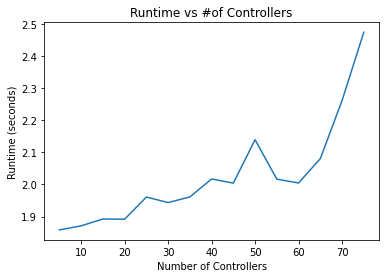

In [4]:
plt.plot(num_controllers_list, run_time)
plt.xlabel("Number of Controllers")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs #of Controllers")
print(run_time)